In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
teis_ifsp_df = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name=0)
child_id_df = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name=1)

c:\Users\Aaron\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
teis_ifsp_df.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [5]:
child_id_df.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT


In [6]:
teis_ifsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CHILD_ID              9543 non-null   int64         
 1   SERVICE_DATE          9543 non-null   datetime64[ns]
 2   START_TIME            9532 non-null   object        
 3   END_TIME              9532 non-null   object        
 4   SERVICE_SETTING       9533 non-null   object        
 5   SERVICE DELIVERY      9543 non-null   object        
 6   ADD_USER              9543 non-null   object        
 7   ADD_DATE              9543 non-null   datetime64[ns]
 8   IFSP Teaming ID name  9543 non-null   object        
 9   Agency Name           9543 non-null   object        
 10  Agency Type           9543 non-null   object        
 11  Service Name          9543 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 894.8+ KB


In [7]:
child_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138664 entries, 0 to 138663
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   POE            138664 non-null  object        
 1   Child ID       138664 non-null  int64         
 2   Referral Date  138664 non-null  datetime64[ns]
 3   Exit Date      15607 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.2+ MB


In [8]:
#renaming columns
teis_ifsp_df.rename(columns={'CHILD_ID': 'child_id', 'SERVICE_DATE': 'service_date', 'START_TIME':'start_time', 'END_TIME': 'end_time', 'SERVICE_SETTING': 'service_setting', 'SERVICE DELIVERY': 'service_delivery', 'ADD_USER': 'add_user', 'ADD_DATE': 'add_date', 'IFSP Teaming ID name': 'ifsp_teaming_id_name', 'Agency Name': 'agency_name', 'Agency Type': 'agency_type', 'Service Name': 'service_name'}, inplace=True)
child_id_df.rename(columns={'POE': 'poe', 'CHILD ID': 'child_id', 'Referral Date':'referral_date', 'Exit Date': 'exist_date'}, inplace=True)

In [9]:
#Getting an idea of number of each service provided
teis_ifsp_df.groupby('ifsp_teaming_id_name').count()

,child_id,service_date,start_time,end_time,service_setting,service_delivery,add_user,add_date,agency_name,agency_type,service_name
ifsp_teaming_id_name,,,,,,,,,,,
Co-Visit,4091,4091,4087,4087,4088,4091,4091,4091,4091,4091,4091
IEP Meeting,632,632,629,629,629,632,632,632,632,632,632
IFSP Meeting,4820,4820,4816,4816,4816,4820,4820,4820,4820,4820,4820


In [10]:
#Count of where services where provided
teis_ifsp_df.groupby('service_setting').count()

,child_id,service_date,start_time,end_time,service_delivery,add_user,add_date,ifsp_teaming_id_name,agency_name,agency_type,service_name
service_setting,,,,,,,,,,,
Community-based,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291
Home,4010,4010,4009,4009,4010,4010,4010,4010,4010,4010,4010
Other,628,628,628,628,628,628,628,628,628,628,628
Telehealth,3604,3604,3604,3604,3604,3604,3604,3604,3604,3604,3604


In [11]:
#dig down on telehealth services
tele_service = teis_ifsp_df[teis_ifsp_df['service_setting'] == 'Telehealth']
tele_service

,child_id,service_date,start_time,end_time,service_setting,service_delivery,add_user,add_date,ifsp_teaming_id_name,agency_name,agency_type,service_name
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
5,458230,2022-01-21,15:30:00,16:30:00,Telehealth,Service Delivered,BROWNSTEPHANIE,2022-01-26 21:04:15,IFSP Meeting,Sunshine Early Intervention - Knox Cty ARC,EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
...,...,...,...,...,...,...,...,...,...,...,...,...
9526,539735,2023-01-31,10:00:00,12:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2023-02-08 21:03:06,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Evaluation - Speech Therapy
9532,539948,2023-01-31,12:30:00,13:30:00,Telehealth,Service Delivered,BOWESARAH,2023-02-01 16:03:54,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Dev. Therapy Prof - Home/Community
9533,539948,2023-01-31,12:30:00,14:30:00,Telehealth,Service Delivered,LEEAMBER,2023-02-01 22:43:45,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Evaluation - Physical Therapy
9536,540668,2023-01-20,09:00:00,09:30:00,Telehealth,Service Delivered,RICHARDSONMARY2,2023-01-23 16:14:37,IFSP Meeting,Expanding Horizons - ETSU,EIRA,Dev. Therapy Prof - Home/Community


In [12]:
#Count of services being provided on telehealth by type
tele_service.groupby('ifsp_teaming_id_name').count()

,child_id,service_date,start_time,end_time,service_setting,service_delivery,add_user,add_date,agency_name,agency_type,service_name
ifsp_teaming_id_name,,,,,,,,,,,
Co-Visit,775,775,775,775,775,775,775,775,775,775,775
IEP Meeting,359,359,359,359,359,359,359,359,359,359,359
IFSP Meeting,2470,2470,2470,2470,2470,2470,2470,2470,2470,2470,2470


In [13]:
#number of children reciving teleheath visits
tele_service['child_id'].nunique()

2563

In [14]:
#number of children reciving visits overall
num_vis = teis_ifsp_df['child_id'].nunique()

In [15]:
#Type of agencys and service
teis_ifsp_df.groupby(['agency_type', 'service_name']).count()

child_id  \
agency_type service_name                                              
EIRA        Consultation – Developmental Therapy                  4   
            Dev. Therapy - BCBA                                   6   
            Dev. Therapy - Behavior                               5   
            Dev. Therapy Center-Based                           154   
            Dev. Therapy ParaProf - Home/Community                1   
            Dev. Therapy Prof - Home/Community                 7665   
            Dev. Therapy – Registered Behavior Tech (RBT)        11   
            Eval/Assess - Developmental                          72   
            Evaluation/Assessment - Vision                        1   
            IFSP Team Member Participation (Face-To-Face)         1   
            IFSP Team Member Participation (Virtual)              2   
            Occupational Therapy                                 15   
            Physical Therapy                                     13   
            Physical Therapy Assistant                           11   
            Speech Therapy                                       14   
            Vision Services                                      62   
Independent Assistive Technology                                  3   
            Dev. Therapy - BCBA                                 138   
            Dev. Therapy Prof - Home/Community                    5   
            Evaluation - BCBA Developmental Therapy               3   
            Evaluation - Occupational Therapy                    26   
            Evaluation - Physical Therapy                        15   
            Evaluation - Speech Therapy                          16   
            IFSP Team Member Participation (Face-To-Face)        19   
            IFSP Team Member Participation (Virtual)             18   
            Occupational Therapy                                500   
            Occupational Therapy Assistant                        2   
            Physical Therapy                                    303   
            Physical Therapy Assistant                           21   
            Speech Therapy                                      434   
            Speech Therapy-Group                                  1   
            Vision Services                                       1   
Other       Dev. Therapy Prof - Home/Community                    1   

                                                           service_date  \
agency_type service_name                                                  
EIRA        Consultation – Developmental Therapy                      4   
            Dev. Therapy - BCBA                                       6   
            Dev. Therapy - Behavior                                   5   
            Dev. Therapy Center-Based                               154   
            Dev. Therapy ParaProf - Home/Community                    1   
            Dev. Therapy Prof - Home/Community                     7665   
            Dev. Therapy – Registered Behavior Tech (RBT)            11   
            Eval/Assess - Developmental                              72   
            Evaluation/Assessment - Vision                            1   
            IFSP Team Member Participation (Face-To-Face)             1   
            IFSP Team Member Participation (Virtual)                  2   
            Occupational Therapy                                     15   
            Physical Therapy                                         13   
            Physical Therapy Assistant                               11   
            Speech Therapy                                           14   
            Vision Services                                          62   
Independent Assistive Technology                                      3   
            Dev. Therapy - BCBA                                     138   
            Dev. Therapy Prof - Home/Community                        5  

In [16]:
#type pf agencys and COvistis/IEP/IFSP
teis_ifsp_df.groupby(['agency_type', 'ifsp_teaming_id_name']).count()

child_id  service_date  start_time  \
agency_type ifsp_teaming_id_name                                       
EIRA        Co-Visit                  2677          2677        2674   
            IEP Meeting                623           623         620   
            IFSP Meeting              4737          4737        4733   
Independent Co-Visit                  1414          1414        1413   
            IEP Meeting                  9             9           9   
            IFSP Meeting                82            82          82   
Other       IFSP Meeting                 1             1           1   

                                  end_time  service_setting  service_delivery  \
agency_type ifsp_teaming_id_name                                                
EIRA        Co-Visit                  2674             2674              2677   
            IEP Meeting                620              620               623   
            IFSP Meeting              4733             4733              4737   
Independent Co-Visit                  1413             1414              1414   
            IEP Meeting                  9                9                 9   
            IFSP Meeting                82               82                82   
Other       IFSP Meeting                 1                1                 1   

                                  add_user  add_date  agency_name  \
agency_type ifsp_teaming_id_name                                    
EIRA        Co-Visit                  2677      2677         2677   
            IEP Meeting                623       623          623   
            IFSP Meeting              4737      4737         4737   
Independent Co-Visit                  1414      1414         1414   
            IEP Meeting                  9         9            9   
            IFSP Meeting                82        82           82   
Other       IFSP Meeting                 1         1            1   

                                  service_name  
agency_type ifsp_teaming_id_name                
EIRA        Co-Visit                      2677  
            IEP Meeting                    623  
            IFSP Meeting                  4737  
Independent Co-Visit                      1414  
            IEP Meeting                      9  
            IFSP Meeting                    82  
Other       IFSP Meeting                     1

In [17]:
#what agencys are providing whicih tele services
tele_agencies = tele_service.groupby(['agency_name', 'ifsp_teaming_id_name']).count()
tele_agencies

child_id  \
agency_name                                  ifsp_teaming_id_name             
BEST (Blind-Visually Impaired Early Svcs Tn) Co-Visit                    11   
                                             IEP Meeting                  3   
                                             IFSP Meeting                12   
BRIDGES - Tennessee Tech University          IFSP Meeting                 9   
Community Development Center                 Co-Visit                    33   
...                                                                     ...   
Twana Mullins                                IFSP Meeting                 1   
Vanderbilt-TRIAD                             IFSP Meeting                 4   
WAVES, Inc.                                  Co-Visit                    49   
                                             IEP Meeting                 27   
                                             IFSP Meeting               164   

                                                                   service_date  \
agency_name                                  ifsp_teaming_id_name                 
BEST (Blind-Visually Impaired Early Svcs Tn) Co-Visit                        11   
                                             IEP Meeting                      3   
                                             IFSP Meeting                    12   
BRIDGES - Tennessee Tech University          IFSP Meeting                     9   
Community Development Center                 Co-Visit                        33   
...                                                                         ...   
Twana Mullins                                IFSP Meeting                     1   
Vanderbilt-TRIAD                             IFSP Meeting                     4   
WAVES, Inc.                                  Co-Visit                        49   
                                             IEP Meeting                     27   
                                             IFSP Meeting                   164   

                                                                   start_time  \
agency_name                                  ifsp_teaming_id_name               
BEST (Blind-Visually Impaired Early Svcs Tn) Co-Visit                      11   
                                             IEP Meeting                    3   
                                             IFSP Meeting                  12   
BRIDGES - Tennessee Tech University          IFSP Meeting                   9   
Community Development Center                 Co-Visit                      33   
...                                                                       ...   
Twana Mullins                                IFSP Meeting                   1   
Vanderbilt-TRIAD                             IFSP Meeting                   4   
WAVES, Inc.                                  Co-Visit                      49   
                                             IEP Meeting                   27   
                                             IFSP Meeting                 164   

                                                                   end_time  \
agency_name                                  ifsp_teaming_id_name             
BEST (Blind-Visually Impaired Early Svcs Tn) Co-Visit                    11   
                                             IEP Meeting                  3   
                                             IFSP Meeting                12   
BRIDGES - Tennessee Tech University          IFSP Meeting                 9   
Community Development Center                 Co-Visit                    33   
...                                                                     ...   
Twana Mullins                                IFSP Meeting                 1   
Vanderbilt-TRIAD                             IFSP Meeting                 4   
WAVES, Inc.                                  Co-Visit                    49   
                                    

DELIVERABLES WORK

Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within the same agency? 

In [18]:
covisits = teis_ifsp_df[teis_ifsp_df['ifsp_teaming_id_name']=='Co-Visit']

In [19]:
covisits_eda1 = covisits.groupby(['agency_name']).count().nlargest(15, 'child_id')
covisits_eda1

,child_id,service_date,start_time,end_time,service_setting,service_delivery,add_user,add_date,ifsp_teaming_id_name,agency_type,service_name
agency_name,,,,,,,,,,,
LeBonheur EI & Dev (LEAD) (vendor),902,902,901,901,902,902,902,902,902,902,902
LeBonheur EI & Dev (LEAD) (EIRA),340,340,340,340,340,340,340,340,340,340,340
Shelby Residential & Voc Svcs(SRVS) (EIRA),232,232,232,232,232,232,232,232,232,232,232
"Therapy & Learning Center, Inc. (EIRA)",216,216,216,216,216,216,216,216,216,216,216
"Kid's Putnam, Inc.",212,212,212,212,212,212,212,212,212,212,212
"Physical Therapy Services, PA (EIRA)",181,181,181,181,181,181,181,181,181,181,181
"WAVES, Inc.",169,169,169,169,169,169,169,169,169,169,169
Siskin Children's Institute (EIRA),149,149,149,149,149,149,149,149,149,149,149
Emory Valley Center,138,138,136,136,136,138,138,138,138,138,138


In [20]:
covisits.groupby('service_name').count().nlargest(15, 'child_id')

,child_id,service_date,start_time,end_time,service_setting,service_delivery,add_user,add_date,ifsp_teaming_id_name,agency_name,agency_type
service_name,,,,,,,,,,,
Dev. Therapy Prof - Home/Community,2400,2400,2397,2397,2397,2400,2400,2400,2400,2400,2400
Occupational Therapy,502,502,501,501,502,502,502,502,502,502,502
Speech Therapy,425,425,425,425,425,425,425,425,425,425,425
Physical Therapy,307,307,307,307,307,307,307,307,307,307,307
Dev. Therapy - BCBA,133,133,133,133,133,133,133,133,133,133,133
Dev. Therapy Center-Based,102,102,102,102,102,102,102,102,102,102,102
Vision Services,60,60,60,60,60,60,60,60,60,60,60
Eval/Assess - Developmental,52,52,52,52,52,52,52,52,52,52,52
Physical Therapy Assistant,32,32,32,32,32,32,32,32,32,32,32


 How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?,What is the cadence of co-visits?Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits? In what setting do co-visits typically occur?

In [21]:
co_times = covisits[covisits['service_delivery']== 'Service Delivered']
#co_times.groupby('child_id').count().nunique()#.sort_values(by = 'child_id', ascending=False)
co_times_count = co_times.groupby('child_id').count().sort_values(by = 'service_delivery', ascending=False)

In [22]:
#Count of co_visits based on unique dates by child
new_count = co_times.groupby("child_id")["service_date"].nunique().reset_index(name="co_visits_counts")
num_co_visits = new_count['co_visits_counts'].sum()
num_co_visits

3552

In [23]:
#how many kids recived covisists
covis_count = co_times_count['service_date'].count()
covis_count

1642

In [24]:
#How many kids with IFSP
ifsp_count = child_id_df['Child ID'].nunique()

In [25]:
#How many not getting visits
no_visits = ifsp_count - num_vis
no_visits

14834

In [26]:
#of kids not getting visits
perct_no_vis = no_visits/ifsp_count *100
perct_no_vis

75.5949650919839

In [27]:
# %of kids who reciveced covisits
perct_covisits = (covis_count/ ifsp_count) * 100
perct_covisits

8.36773174336238

In [28]:
#percent of kids reciving other visits
perct_othervisits = ((num_vis - covis_count)/ifsp_count)*100
perct_othervisits

16.037303164653725

In [29]:
pie = [no_visits, covis_count, (num_vis - covis_count)]
pie1 = pie[0:3]
pie1

[14834, 1642, 3147]

In [47]:
names = 'No visits', 'Co-visits', 'Other vists'

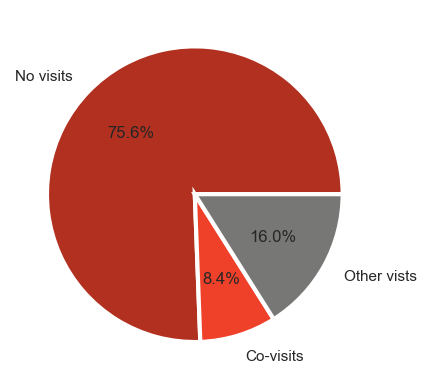

In [49]:
sns.set_theme()
colors = ["#B1301F", "#EF412A", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616", "#343434"]
sns.set_palette(colors)
pieplt = plt.pie(pie1, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
#.pie(sizes, labels=labels, autopct='%1.1f%%')
#pieplt.suptitle('Different types of oscillations', fontsize=16)
plt.show();

In [40]:
barname = 'No visits','Other vists', 'Co-visits'
bar = [perct_no_vis,perct_othervisits,perct_covisits]
bar1 = bar[0:3]

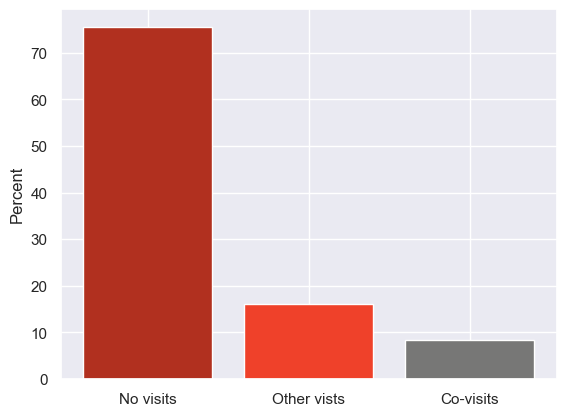

In [50]:
sns.set_theme()
colors = ["#B1301F", "#EF412A", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616", "#343434"]
sns.set_palette(colors)
x_pos = np.arange(len(bar1))
 
# Create bars and choose color
plt.bar(x_pos, bar1, color = colors)
 
# Add title and axis names
plt.ylabel('Percent')
 
# Create names on the x axis
plt.xticks(x_pos, barname)
 
# Show graph
plt.show()

In [ ]:
#How many covists Delivered vs not delivered
#Not filtered
covisits.count()

child_id                4091
service_date            4091
start_time              4087
end_time                4087
service_setting         4088
service_delivery        4091
add_user                4091
add_date                4091
ifsp_teaming_id_name    4091
agency_name             4091
agency_type             4091
service_name            4091
dtype: int64

In [ ]:
#Actually delivered
co_times.count()

child_id                4087
service_date            4087
start_time              4087
end_time                4087
service_setting         4087
service_delivery        4087
add_user                4087
add_date                4087
ifsp_teaming_id_name    4087
agency_name             4087
agency_type             4087
service_name            4087
dtype: int64

In [ ]:
#How many kids reciving at least 6 visits
co_times_count[co_times_count['SERVICE DELIVERY']> 5].count()

service_date            131
start_time              131
end_time                131
service_setting         131
SERVICE DELIVERY        131
add_user                131
add_date                131
ifsp_teaming_id_name    131
agency_name             131
agency_type             131
service_name            131
dtype: int64

In [ ]:
#How many kids reciving more than 6 visits
co_times_count[co_times_count['SERVICE DELIVERY']> 6].count()

service_date            97
start_time              97
end_time                97
service_setting         97
SERVICE DELIVERY        97
add_user                97
add_date                97
ifsp_teaming_id_name    97
agency_name             97
agency_type             97
service_name            97
dtype: int64

In [ ]:
#Where are covisits happening
co_times.groupby('service_setting').count()

,child_id,service_date,start_time,end_time,SERVICE DELIVERY,add_user,add_date,ifsp_teaming_id_name,agency_name,agency_type,service_name
service_setting,,,,,,,,,,,
Community-based,871,871,871,871,871,871,871,871,871,871,871
Home,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940
Other,501,501,501,501,501,501,501,501,501,501,501
Telehealth,775,775,775,775,775,775,775,775,775,775,775


In [ ]:
teis_ifsp_df

In [ ]:
# Filter the rows where 'IFSP Teaming ID name' is 'Co-Visit'
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

# Sort the co-visit rows by CHILD_ID and SERVICE_DATE
co_visit_rows = co_visit_rows.sort_values(['CHILD_ID', 'SERVICE_DATE'])

# Calculate the time difference between consecutive co-visits for each child
co_visit_rows['VISIT_DIFF'] = co_visit_rows.groupby('CHILD_ID')['SERVICE_DATE'].diff()

# Remove the first co-visit for each child since it doesn't have a previous co-visit
co_visit_rows = co_visit_rows.dropna(subset=['VISIT_DIFF'])

# Print the resulting dataframe
print(co_visit_rows[['CHILD_ID', 'SERVICE_DATE', 'VISIT_DIFF']])

In [ ]:
# Calculate the average time difference
avg_time_diff = co_visit_rows['VISIT_DIFF'].mean()

print("Average time difference between co-visits:", avg_time_diff)

In [ ]:
##Are there patterns in timeof year that co-visits occur?

##filter df for child id , service date, service delivery for plot use
covisit_line_plot_df = covisit_check_df[['CHILD_ID','SERVICE_DATE','SERVICE_DELIVERY']]
print(covisit_line_plot_df.head())

##value_counts for service dates
service_date_plot = covisit_line_plot_df['SERVICE_DATE'].value_counts()

##convert to df
service_date_plot_df = pd.DataFrame(service_date_plot)

##fix columns
service_date_plot_df.columns = ['VALUE_COUNT']
service_date_plot_df.index.name = 'DATE'
service_date_plot_df = service_date_plot_df.reset_index()

##extract date info
service_date_plot_df['YEAR'] = service_date_plot_df['DATE'].dt.year
service_date_plot_df['MONTH'] = service_date_plot_df['DATE'].dt.month


print(service_date_plot_df)